<div id="header"><p style="color:#3364ff; text-align:center; font-weight:bold; font-family:verdana; font-size:25px;">Grover's Algorithm </p></div>

[licenseBDG]: https://img.shields.io/badge/License-CC-orange?style=plastic
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[mywebsiteBDG]:https://img.shields.io/badge/website-jaorduz.github.io-0abeeb?style=plastic
[mywebsite]: https://jaorduz.github.io/

[mygithubBDG-jaorduz]: https://img.shields.io/badge/jaorduz-repos-blue?logo=github&label=jaorduz&style=plastic
[mygithub-jaorduz]: https://github.com/jaorduz/

[mygithubBDG-jaorduc]: https://img.shields.io/badge/jaorduc-repos-blue?logo=github&label=jaorduc&style=plastic 
[mygithub-jaorduc]: https://github.com/jaorduc/

[myXprofileBDG]: https://img.shields.io/static/v1?label=Follow&message=jaorduc&color=2ea44f&style=plastic&logo=X&logoColor=black
[myXprofile]:https://twitter.com/jaorduc


[![website - jaorduz.github.io][mywebsiteBDG]][mywebsite]
[![Github][mygithubBDG-jaorduz]][mygithub-jaorduz]
[![Github][mygithubBDG-jaorduc]][mygithub-jaorduc]
[![Follow @jaorduc][myXprofileBDG]][myXprofile]
[![CC License][licenseBDG]][license]

---

<p style="text-align:right; font-family:verdana;"><a href="mywebsite" style="color:#3364ff; text-decoration:none;">@Javier Orduz</a></p>    


---


## Objectives

*   Install the packages for quantum computing, and implement the Grovers algorithm with Qiskit. 


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#the problem">The problem</a></li>
        <li><a href="https://#the_packages">The Packages</a></li>
        <!-- <li><a href="https://#pre-processing">Pre-processing</a></li> -->
        <!-- <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li> -->
        <!-- <li><a href="https://#modeling">Modeling</a></li> -->
        <!-- <li><a href="https://#prediction">Prediction</a></li> -->
        <!-- <li><a href="https://#evaluation">Evaluation</a></li> -->
        <!-- <li><a href="https://#visualization">Visualization</a></li> -->
    </ol>
</div>
<br>
<hr>


<div id="the_problem"> 
    <h1>The problem</h1>

In this lab exercise, you will learn a popular algorithm, Grover. 
    Although the purpose of Grover's algorithm is usually described as "searching a database", 
    it may be more accurate to describe it as "inverting a function". Roughly speaking, if we 
    have a function $y=f(x)$ that can be evaluated on a quantum computer, Grover's algorithm 
    allows us to calculate $x$ when given $y$. Inverting a function is related to the searching of 
    a database because we could come up with a function that produces a particular value of $y$ 
    if $x$ matches a desired entry in a database, and another value of $y$ for other values of $x$.

The mathematical representation of the Grover's algorithm. For given an oracle function 
$$
f : \{0, 1\}^n \to \{0, 1\}^n, \exists~!~\omega : f(\omega) = a,
$$ 
find $\omega$.

</div>
<hr>



<div id="the_packages"> 
    <h1>The Packages</h1>
This section calls the packages used for the algorithm implementation.
</div>


In [9]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

In [10]:
from qiskit_aer import Aer, AerSimulator

<div id="downloading_data"> 
    <h2>Initializing qubits</h2>
    This subsection shows how to initialize quantum bits (qbits/qubits) and classical bits/cbits. The classical bits will be the room to record measurements. Additionally we will create the quantum circuit and add qbits and bits. 
</div>


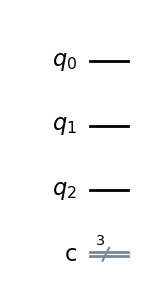

In [ ]:
qr = QuantumRegister(3, name='q')  
cr = ClassicalRegister(3, name='c')
circuit = QuantumCircuit(qr, cr)
circuit.draw(output="mpl")

<div id="downloading_data"> 
    <h2>Adding Gates</h2>
    We put Hadamard (superposition) gates on each qbit, and putting everything together, organize (inclduing a barrier) and display the circuit.
</div>


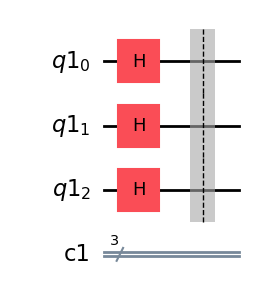

In [12]:
circuit.h(qr)
circuit.barrier()
circuit.draw(output="mpl")

<div id="downloading_data"> 
    <h2>Adding Control Z gates</h2>
Now we will add the Control Z gates to introduce entanglement bewteen qbits.
</div>


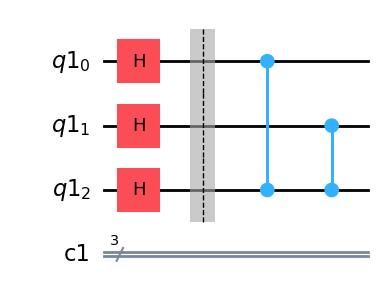

In [ ]:
circuit.cz(qr[2], qr[0])
circuit.cz(qr[2], qr[1])
circuit.draw(output="mpl")

<div id="downloading_data"> 
    <h2>Oracle or Difussion: that's a part</h2>
Inversion around the average
</div>


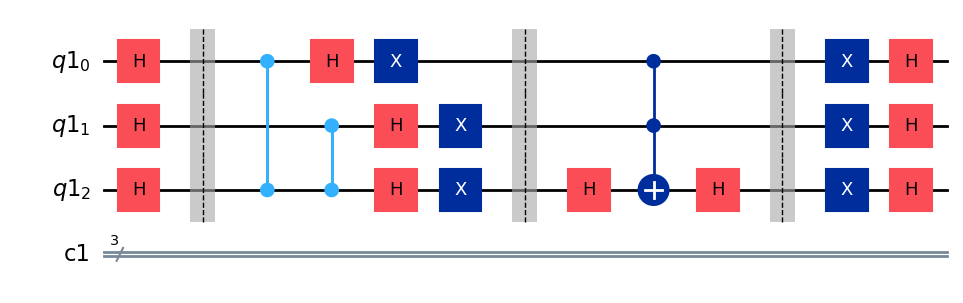

In [ ]:
circuit.h(qr)
circuit.x(qr)
circuit.barrier()
circuit.h(qr[2])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.h(qr[2])
circuit.barrier()
circuit.x(qr)
circuit.h(qr)
circuit.draw(output="mpl")

In [15]:
circuit.measure(qr, cr)

# Run our circuit with local simulator
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = backend.run(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

{'101': 519, '110': 505}


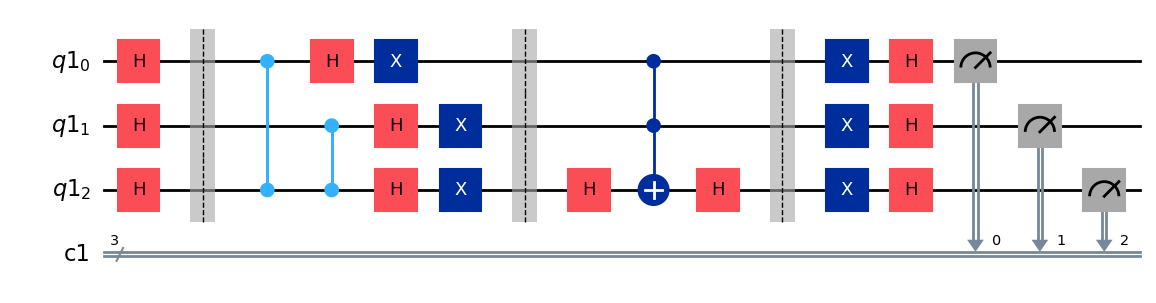

In [16]:
circuit.draw(output="mpl")

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [17]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.10.15
qiskit==1.2.1
qiskit-aer==0.13.3
qiskit-ibm-provider==0.11.0


# Exercises



# References

[0] [Grover Algorithm implementation 1](https://github.com/jaorduz/QuantumComputingExamples/blob/master/06_Grovers_Algorithm.py)

[1] [Grover Algorithm implementation 2](https://www.quantiki.org/wiki/grovers-search-algorithm)